# Retrieve


We want to download the monthly precipitation for February. I use the automatically generated request from the CDS server. There are two datasets we can use to download the data: [Seasonal forecast daily data on single levels](https://cds.climate.copernicus.eu/cdsapp#!/dataset/seasonal-original-single-levels?tab=form) and [Seasonal forecast monthly statistics on single levels](https://cds.climate.copernicus.eu/cdsapp#!/dataset/seasonal-monthly-single-levels?tab=form). We will use the latter for easy downloading of the monthly values. If we want to go to higher temporal resolution, such as daily extremes, we will have to consult the other dataset. 

To get started with CDS, you have to register at https://cds.climate.copernicus.eu/ and copy your UID and API key from https://cds.climate.copernicus.eu/user in the  `~/.cdsapirc`  file in the home directory of your user. See the [ml-flood project](https://nbviewer.jupyter.org/github/esowc/ml_flood/blob/master/notebooks/1_data_download_analysis_visualization/1.01_cdsapi_setup.ipynb) for more details


In [7]:
UID = 'UID'
API_key = 'API_key'

In [8]:
import os 
#Uncomment the following lines to write the UID and API key in the .cdsapirc file
# with open(os.path.join(os.path.expanduser('~'), '.cdsapirc'), 'w') as f:
#     f.write('url: https://cds.climate.copernicus.eu/api/v2\n')
#     f.write(f'key: {UID}:{API_key}')

46

47

### Import packages

In [1]:
##This is so variables get printed within jupyter
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [2]:
##import packages
import os
import cdsapi ## check the current working directory, which should be the UNSEEN-open directory
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs

In [3]:
##We want the working directory to be the UNSEEN-open directory
pwd = os.getcwd() ##current working directory is UNSEEN-open/Notebooks/1.Download
pwd #print the present working directory
os.chdir(pwd+'/../../') # Change the working directory to UNSEEN-open
os.getcwd() #print the working directory

'C:\\Users\\Timo\\OneDrive - Loughborough University\\GitHub\\UNSEEN-open\\doc\\Notebooks\\1.Download'

'C:\\Users\\Timo\\OneDrive - Loughborough University\\GitHub\\UNSEEN-open\\doc'

In [4]:
retrieve.retrieve_SEAS5(variables = 'total_precipitation', target_months = [2], 
         area = [60, -11, 50, 2], folder = '../UK_example/SEAS5/')

In [5]:
retrieve.retrieve_ERA5(variables = ['2m_temperature','2m_dewpoint_temperature'], target_months = [3,4,5], 
         area = [70, -11, 30, 120], folder = '../Siberia_example/ERA5/')

In [6]:
retrieve.retrieve_ERA5(variables = 'total_precipitation', target_months = [2], 
         area = [60, -11, 50, 2], folder = '../UK_example/ERA5/')

In [2]:
os.path.abspath('.')

'C:\\Users\\Timo\\OneDrive - Loughborough University\\GitHub\\UNSEEN-open\\doc\\Notebooks\\1.Download'

In [1]:
import os

In [3]:
import sys
sys.path.insert(0, os.path.abspath('../../../'))
os.chdir(os.path.abspath('../../../'))

import src.cdsretrieve as retrieve
import src.preprocess as preprocess

import numpy as np
import xarray as xr

In [4]:
?retrieve.retrieve_SEAS5

In [5]:
retrieve.retrieve_SEAS5(
    variables=['2m_temperature', '2m_dewpoint_temperature'],
    target_months=[8],
    area=[70, -130, 20, -70],
    years=np.arange(1981, 2021),
    folder='E:/PhD/California_example/SEAS5/')

2020-10-01 20:18:09,006 INFO Welcome to the CDS
2020-10-01 20:18:09,011 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 20:18:09,769 INFO Request is queued
2020-10-01 20:18:59,955 INFO Request is completed
2020-10-01 20:18:59,957 INFO Downloading http://136.156.132.236/cache-compute-0007/cache/data9/adaptor.mars.external-1601576325.1828237-12989-6-0e86d7de-a923-437e-9d39-b1703fae56c6.nc to E:/PhD/California_example/SEAS5/198107.nc (305.7K)
2020-10-01 20:19:00,751 INFO Download rate 385.3K/s                                                                    
2020-10-01 20:19:01,434 INFO Welcome to the CDS
2020-10-01 20:19:01,436 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 20:19:01,741 INFO Request is queued
2020-10-01 20:20:17,663 INFO Request is completed
2020-10-01 20:20:17,665 INFO Downloading http://136.156.132.235/cache-compute-0006/cache/dat

2020-10-01 20:45:02,357 INFO Download rate 386.9K/s                                                                    
2020-10-01 20:45:03,774 INFO Welcome to the CDS
2020-10-01 20:45:03,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 20:45:04,515 INFO Request is queued
2020-10-01 20:47:56,768 INFO Request is completed
2020-10-01 20:47:56,769 INFO Downloading http://136.156.132.201/cache-compute-0004/cache/data8/adaptor.mars.external-1601578040.2859044-32586-23-cc3c06bc-8754-43c4-a36b-3881e90b4ed0.nc to E:/PhD/California_example/SEAS5/198304.nc (305.7K)
2020-10-01 20:47:57,774 INFO Download rate 304.5K/s                                                                    
2020-10-01 20:47:58,567 INFO Welcome to the CDS
2020-10-01 20:47:58,568 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 20:47:58,805 INFO Request is queued
2020-10-01 20:49:15,0

2020-10-01 21:23:04,203 INFO Download rate 385.4K/s                                                                    
2020-10-01 21:23:05,205 INFO Welcome to the CDS
2020-10-01 21:23:05,206 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 21:23:05,605 INFO Request is queued
2020-10-01 21:25:00,207 INFO Request is completed
2020-10-01 21:25:00,208 INFO Downloading http://136.156.133.46/cache-compute-0015/cache/data1/adaptor.mars.external-1601580263.3912485-15819-3-9624072f-0e4a-4392-ab41-e85a109af959.nc to E:/PhD/California_example/SEAS5/198606.nc (305.7K)
2020-10-01 21:25:01,220 INFO Download rate 302.8K/s                                                                    
2020-10-01 21:25:01,870 INFO Welcome to the CDS
2020-10-01 21:25:01,872 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 21:25:02,285 INFO Request is queued
2020-10-01 21:25:35,254

2020-10-01 21:47:31,274 INFO Download rate 56.3K/s                                                                     
2020-10-01 21:47:32,984 INFO Welcome to the CDS
2020-10-01 21:47:32,985 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 21:47:34,573 INFO Request is queued
2020-10-01 21:47:37,303 INFO Request is running
2020-10-01 21:47:39,670 INFO Request is completed
2020-10-01 21:47:39,671 INFO Downloading http://136.156.133.41/cache-compute-0013/cache/data2/adaptor.mars.external-1601581655.0260944-21714-35-1f60d9c3-1834-4aba-985a-be18c832a41a.nc to E:/PhD/California_example/SEAS5/198803.nc (305.7K)
2020-10-01 21:47:40,365 INFO Download rate 440.5K/s                                                                    
2020-10-01 21:47:41,694 INFO Welcome to the CDS
2020-10-01 21:47:41,694 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 21:47:42,4

2020-10-01 21:58:08,618 INFO Request is queued
2020-10-01 21:58:11,356 INFO Request is running
2020-10-01 21:58:13,719 INFO Request is completed
2020-10-01 21:58:13,721 INFO Downloading http://136.156.132.198/cache-compute-0003/cache/data2/adaptor.mars.external-1601582289.9390843-20153-33-44bbf0ae-ff45-4131-aca3-198980cd6488.nc to E:/PhD/California_example/SEAS5/199106.nc (305.7K)
2020-10-01 21:58:14,410 INFO Download rate 444.6K/s                                                                    
2020-10-01 21:58:15,200 INFO Welcome to the CDS
2020-10-01 21:58:15,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 21:58:15,425 INFO Request is queued
2020-10-01 22:01:07,707 INFO Request is completed
2020-10-01 22:01:07,708 INFO Downloading http://136.156.133.42/cache-compute-0014/cache/data0/adaptor.mars.external-1601582409.3776717-15379-34-0547d6f5-804f-468a-a1bd-6d5787639b38.nc to E:/PhD/California_example/SEAS5/19

2020-10-01 22:18:24,994 INFO Download rate 379.9K/s                                                                    
2020-10-01 22:18:25,921 INFO Welcome to the CDS
2020-10-01 22:18:25,922 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 22:18:27,212 INFO Request is queued
2020-10-01 22:19:43,111 INFO Request is completed
2020-10-01 22:19:43,113 INFO Downloading http://136.156.133.39/cache-compute-0012/cache/data1/adaptor.mars.external-1601583573.4803698-14037-9-9d5584d9-5ef4-444d-802b-75140f4e7af5.nc to E:/PhD/California_example/SEAS5/199303.nc (305.7K)
2020-10-01 22:19:43,798 INFO Download rate 446.6K/s                                                                    
2020-10-01 22:19:44,800 INFO Welcome to the CDS
2020-10-01 22:19:44,802 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 22:19:45,858 INFO Request is queued
2020-10-01 22:20:18,840

2020-10-01 22:52:54,424 INFO Download rate 274.1K/s                                                                    
2020-10-01 22:52:55,133 INFO Welcome to the CDS
2020-10-01 22:52:55,134 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 22:52:55,909 INFO Request is queued
2020-10-01 22:54:12,116 INFO Request is completed
2020-10-01 22:54:12,118 INFO Downloading http://136.156.133.36/cache-compute-0010/cache/data9/adaptor.mars.external-1601585634.487186-2289-7-910024b9-6391-44da-a937-a3a28ac36f22.nc to E:/PhD/California_example/SEAS5/199605.nc (305.7K)
2020-10-01 22:54:12,819 INFO Download rate 436.9K/s                                                                    
2020-10-01 22:54:14,662 INFO Welcome to the CDS
2020-10-01 22:54:14,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 22:54:15,096 INFO Request is queued
2020-10-01 22:57:07,344 I

2020-10-01 23:22:40,412 INFO Download rate 444.8K/s                                                                    
2020-10-01 23:22:41,397 INFO Welcome to the CDS
2020-10-01 23:22:41,399 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 23:22:41,743 INFO Request is queued
2020-10-01 23:22:50,331 INFO Request is running
2020-10-01 23:22:55,512 INFO Request is completed
2020-10-01 23:22:55,515 INFO Downloading http://136.156.132.198/cache-compute-0003/cache/data8/adaptor.mars.external-1601587368.445949-17220-3-206beb17-79ba-4fc7-ba0b-0cea1ee3c6b2.nc to E:/PhD/California_example/SEAS5/199907.nc (305.7K)
2020-10-01 23:22:56,635 INFO Download rate 273.3K/s                                                                    
2020-10-01 23:22:57,553 INFO Welcome to the CDS
2020-10-01 23:22:57,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 23:22:58,46

2020-10-01 23:31:58,745 INFO Request is completed
2020-10-01 23:31:58,746 INFO Downloading http://136.156.133.46/cache-compute-0015/cache/data4/adaptor.mars.external-1601587866.5394669-24062-26-704cc1bf-e4d1-4d51-91c0-c1d9dc02cb5c.nc to E:/PhD/California_example/SEAS5/200105.nc (305.7K)
2020-10-01 23:31:59,777 INFO Download rate 297K/s                                                                      
2020-10-01 23:32:00,750 INFO Welcome to the CDS
2020-10-01 23:32:00,751 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 23:32:02,257 INFO Request is queued
2020-10-01 23:34:54,542 INFO Request is completed
2020-10-01 23:34:54,543 INFO Downloading http://136.156.133.36/cache-compute-0010/cache/data2/adaptor.mars.external-1601588068.1354113-20719-31-ddbb8f54-88ab-4360-81b7-7bbc6f93d163.nc to E:/PhD/California_example/SEAS5/200104.nc (305.7K)
2020-10-01 23:34:55,349 INFO Download rate 379.9K/s                            

2020-10-01 23:51:05,489 INFO Request is queued
2020-10-01 23:52:59,956 INFO Request is completed
2020-10-01 23:52:59,957 INFO Downloading http://136.156.132.153/cache-compute-0002/cache/data8/adaptor.mars.external-1601589163.5005999-32644-17-141a4b6f-1cd3-48ba-99b2-867fea6c59fe.nc to E:/PhD/California_example/SEAS5/200407.nc (305.7K)
2020-10-01 23:53:00,849 INFO Download rate 343.1K/s                                                                    
2020-10-01 23:53:01,808 INFO Welcome to the CDS
2020-10-01 23:53:01,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-01 23:53:03,920 INFO Request is queued
2020-10-01 23:53:36,896 INFO Request is running
2020-10-01 23:53:54,102 INFO Request is completed
2020-10-01 23:53:54,103 INFO Downloading http://136.156.132.210/cache-compute-0005/cache/data3/adaptor.mars.external-1601589215.5559714-23103-1-45a03818-10fa-48ab-8d52-c2ef70662277.nc to E:/PhD/California_example/SEAS5/20

2020-10-02 00:04:32,053 INFO Download rate 318.6K/s                                                                    
2020-10-02 00:04:33,492 INFO Welcome to the CDS
2020-10-02 00:04:33,493 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-02 00:04:35,481 INFO Request is queued
2020-10-02 00:05:08,451 INFO Request is running
2020-10-02 00:05:25,651 INFO Request is completed
2020-10-02 00:05:25,654 INFO Downloading http://136.156.132.153/cache-compute-0002/cache/data9/adaptor.mars.external-1601589904.0390737-5343-33-1e3a2092-cd37-4d97-9e35-e3d68bc6b150.nc to E:/PhD/California_example/SEAS5/200604.nc (305.7K)
2020-10-02 00:05:26,352 INFO Download rate 437.6K/s                                                                    
2020-10-02 00:05:28,951 INFO Welcome to the CDS
2020-10-02 00:05:28,952 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-02 00:05:30,2

2020-10-02 00:14:56,029 INFO Request is completed
2020-10-02 00:14:56,031 INFO Downloading http://136.156.133.36/cache-compute-0010/cache/data1/adaptor.mars.external-1601590487.6295393-20486-5-540f4175-57ea-4546-a7de-c663e7369da9.nc to E:/PhD/California_example/SEAS5/200907.nc (305.7K)
2020-10-02 00:14:56,736 INFO Download rate 434K/s                                                                      
2020-10-02 00:14:57,916 INFO Welcome to the CDS
2020-10-02 00:14:57,918 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-02 00:14:59,065 INFO Request is queued
2020-10-02 00:15:01,792 INFO Request is running
2020-10-02 00:15:04,154 INFO Request is completed
2020-10-02 00:15:04,155 INFO Downloading http://136.156.132.198/cache-compute-0003/cache/data9/adaptor.mars.external-1601590499.2262278-14778-16-9544e586-41d7-4f63-a4e2-f5d875f0921e.nc to E:/PhD/California_example/SEAS5/200906.nc (305.7K)
2020-10-02 00:15:05,264 INFO Do

2020-10-02 00:32:56,689 INFO Request is queued
2020-10-02 00:34:12,591 INFO Request is completed
2020-10-02 00:34:12,593 INFO Downloading http://136.156.132.110/cache-compute-0001/cache/data5/adaptor.mars.external-1601591642.7294023-13475-18-6afd81d1-8bd7-4826-b988-5598793e28fb.nc to E:/PhD/California_example/SEAS5/201104.nc (305.7K)
2020-10-02 00:34:13,432 INFO Download rate 364.9K/s                                                                    
2020-10-02 00:34:14,134 INFO Welcome to the CDS
2020-10-02 00:34:14,136 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-02 00:34:14,690 INFO Request is queued
2020-10-02 00:36:09,172 INFO Request is completed
2020-10-02 00:36:09,173 INFO Downloading http://136.156.132.235/cache-compute-0006/cache/data6/adaptor.mars.external-1601591748.0933983-27297-16-3cb1b7be-02e8-4f93-a3d2-30bf9fbeaa98.nc to E:/PhD/California_example/SEAS5/201103.nc (305.7K)
2020-10-02 00:36:10,186 INFO D

2020-10-02 00:46:11,535 INFO Download rate 290K/s                                                                      
2020-10-02 00:46:12,698 INFO Welcome to the CDS
2020-10-02 00:46:12,700 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-02 00:46:13,252 INFO Request is queued
2020-10-02 00:47:29,155 INFO Request is running
2020-10-02 00:48:07,709 INFO Request is completed
2020-10-02 00:48:07,711 INFO Downloading http://136.156.133.42/cache-compute-0014/cache/data2/adaptor.mars.external-1601592445.4287472-937-1-81b9f1f3-ffac-496a-b405-883a4af970e8.nc to E:/PhD/California_example/SEAS5/201406.nc (305.7K)
2020-10-02 00:48:08,499 INFO Download rate 388.8K/s                                                                    
2020-10-02 00:48:09,297 INFO Welcome to the CDS
2020-10-02 00:48:09,299 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-02 00:48:11,440 

2020-10-02 00:58:12,880 INFO Download rate 445.1K/s                                                                    
2020-10-02 00:58:13,633 INFO Welcome to the CDS
2020-10-02 00:58:13,635 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-02 00:58:13,967 INFO Request is queued
2020-10-02 01:00:08,418 INFO Request is completed
2020-10-02 01:00:08,420 INFO Downloading http://136.156.132.110/cache-compute-0001/cache/data4/adaptor.mars.external-1601593176.0560248-1648-5-b13bd7c6-b95c-43cb-916b-8aefb67302e8.nc to E:/PhD/California_example/SEAS5/201603.nc (305.7K)
2020-10-02 01:00:09,210 INFO Download rate 387.9K/s                                                                    
2020-10-02 01:00:10,388 INFO Welcome to the CDS
2020-10-02 01:00:10,390 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-02 01:00:10,684 INFO Request is queued
2020-10-02 01:01:26,591

2020-10-02 01:18:54,380 INFO Downloading http://136.156.133.46/cache-compute-0015/cache/data8/adaptor.mars.external-1601594318.7937357-5659-27-8282228c-8455-4352-ad81-c2c031dfbeed.nc to E:/PhD/California_example/SEAS5/201906.nc (621.8K)
2020-10-02 01:18:55,440 INFO Download rate 587.4K/s                                                                    
2020-10-02 01:18:56,369 INFO Welcome to the CDS
2020-10-02 01:18:56,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-10-02 01:18:56,590 INFO Request is queued
2020-10-02 01:19:18,051 INFO Request is completed
2020-10-02 01:19:18,053 INFO Downloading http://136.156.132.235/cache-compute-0006/cache/data8/adaptor.mars.external-1601594349.4206452-26586-3-18a918ff-8036-4fdd-96af-647f551a1be7.nc to E:/PhD/California_example/SEAS5/201905.nc (621.8K)
2020-10-02 01:19:19,161 INFO Download rate 561.6K/s                                                                    
2020-10-02

In [6]:
retrieve.retrieve_ERA5(variables=['2m_temperature', '2m_dewpoint_temperature'],
                       target_months=[8],
                       area=[70, -130, 20, -70],
                       folder='E:/PhD/California_example/SEAS5/')

2020-10-02 01:23:30,467 INFO Welcome to the CDS
2020-10-02 01:23:30,468 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2020-10-02 01:23:30,675 INFO Request is queued
2020-10-02 01:23:33,399 INFO Request is running
2020-10-02 01:23:39,266 INFO Request is completed
2020-10-02 01:23:39,267 INFO Downloading http://136.156.133.37/cache-compute-0011/cache/data4/adaptor.mars.internal-1601594610.7303944-8809-11-5de19df5-bbb2-4d5f-8e66-fa47b01efe57.nc to E:/PhD/California_example/SEAS5/ERA5_1979.nc (13.9K)
2020-10-02 01:23:39,833 INFO Download rate 24.6K/s                                                                     
2020-10-02 01:23:40,905 INFO Welcome to the CDS
2020-10-02 01:23:40,907 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2020-10-02 01:23:41,431 INFO Request is queued
2020-10-02 01:23:42,540 INFO Request is running
2020-10-02 01:23:44

2020-10-02 01:25:10,403 INFO Download rate 25.7K/s                                                                     
2020-10-02 01:25:11,264 INFO Welcome to the CDS
2020-10-02 01:25:11,266 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2020-10-02 01:25:11,658 INFO Request is queued
2020-10-02 01:25:14,715 INFO Request is running
2020-10-02 01:25:20,567 INFO Request is completed
2020-10-02 01:25:20,568 INFO Downloading http://136.156.133.42/cache-compute-0014/cache/data4/adaptor.mars.internal-1601594712.2200758-16004-31-8dd5b047-5846-4fe0-b556-0f2130b892d4.nc to E:/PhD/California_example/SEAS5/ERA5_1991.nc (13.9K)
2020-10-02 01:25:21,104 INFO Download rate 26K/s                                                                       
2020-10-02 01:25:22,374 INFO Welcome to the CDS
2020-10-02 01:25:22,376 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly

2020-10-02 01:27:11,530 INFO Download rate 25.5K/s                                                                     
2020-10-02 01:27:13,001 INFO Welcome to the CDS
2020-10-02 01:27:13,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2020-10-02 01:27:14,304 INFO Request is queued
2020-10-02 01:27:19,392 INFO Request is completed
2020-10-02 01:27:19,393 INFO Downloading http://136.156.133.37/cache-compute-0011/cache/data1/adaptor.mars.internal-1601594835.912003-9591-18-693fb726-607c-4a42-b350-0bdf2346c03a.nc to E:/PhD/California_example/SEAS5/ERA5_2003.nc (13.9K)
2020-10-02 01:27:19,737 INFO Download rate 40.4K/s                                                                     
2020-10-02 01:27:21,418 INFO Welcome to the CDS
2020-10-02 01:27:21,420 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2020-10-02 01:27:22,420 INFO Request is que

2020-10-02 01:28:34,030 INFO Download rate 26.4K/s                                                                     
2020-10-02 01:28:35,534 INFO Welcome to the CDS
2020-10-02 01:28:35,535 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2020-10-02 01:28:36,768 INFO Request is queued
2020-10-02 01:28:39,494 INFO Request is running
2020-10-02 01:28:45,345 INFO Request is completed
2020-10-02 01:28:45,346 INFO Downloading http://136.156.132.198/cache-compute-0003/cache/data2/adaptor.mars.internal-1601594918.8619695-25660-5-6dac411c-063b-4b75-90a2-16fc7df65e97.nc to E:/PhD/California_example/SEAS5/ERA5_2015.nc (13.9K)
2020-10-02 01:28:45,887 INFO Download rate 25.7K/s                                                                     
2020-10-02 01:28:47,765 INFO Welcome to the CDS
2020-10-02 01:28:47,766 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly

### First download

In our request, we will use the monthly mean. Interestingly, there is also the option to use the monthly maximum! We previously downloaded the data on daily resolution and extracted the monthly (or seasonal) maximum from that data. If we could just download the monthly maximum instead that might save a lot of processing power! However, you would be restricted to daily extremes only, for multi-day extremes (5 days is often used), you would have to do the original processing workflow. We select the UK domain to reduce the size of the download.

Here I download the monthly mean total precipitation (both convective and large scale precipitation) forecast for February 1993. It downloads all 25 ensemble members for the forecasts initialized in january.    

In [4]:
##Our first download:

c = cdsapi.Client()

c.retrieve(
    'seasonal-monthly-single-levels',
    {
        'format': 'netcdf',
        'originating_centre': 'ecmwf',
        'system': '5',
        'variable': 'total_precipitation',
        'product_type': [
            'monthly_mean', #'monthly_maximum',, 'monthly_standard_deviation',  
        ],
        'year': '1993', #data before 1993 is available.  
        'month': '01', #Initialization month. Target month is February (2), initialization months are August-January (8-12,1)
        'leadtime_month': [ ##Use of single months is much faster. Leadtime 0 does not exist. The first lead time is 1.
            '1', '2',
        ],
        'area': [##Select UK domain to reduce the size of the download
            60, -11, 50,
            2,
        ],
    },
    'Data/First_download.nc') ##can I use nc? yes! 

2020-05-13 10:08:56,140 INFO Welcome to the CDS
2020-05-13 10:08:56,142 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-05-13 10:08:56,983 INFO Request is completed
2020-05-13 10:08:56,984 INFO Downloading http://136.156.132.110/cache-compute-0001/cache/data0/adaptor.mars.external-1589266964.5635436-26283-29-a38e8975-b0ec-49ee-8f9b-7dea389f59cf.nc to Data/First_download.nc (16.4K)
2020-05-13 10:08:57,131 INFO Download rate 112.7K/s


Result(content_length=16800,content_type=application/x-netcdf,location=http://136.156.132.110/cache-compute-0001/cache/data0/adaptor.mars.external-1589266964.5635436-26283-29-a38e8975-b0ec-49ee-8f9b-7dea389f59cf.nc)

## Use xarray to visualize the netcdf file

I open the downloaded file and plot February 1993 precipitation over the UK. 

In [5]:
pr_1993_ds=xr.open_dataset('Data/First_download.nc')
pr_1993_ds


<xarray.Dataset>
Dimensions:    (latitude: 11, longitude: 14, number: 25, time: 2)
Coordinates:
  * longitude  (longitude) float32 -11.0 -10.0 -9.0 -8.0 ... -1.0 0.0 1.0 2.0
  * latitude   (latitude) float32 60.0 59.0 58.0 57.0 ... 53.0 52.0 51.0 50.0
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9 ... 16 17 18 19 20 21 22 23 24
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01
Data variables:
    tprate     (time, number, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-12 07:02:45 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

I select ensemble member 0 and february precipitation ('tprate' called apparently) and I use cartopy to make the map. 

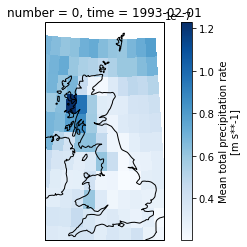

In [6]:
## Use cartopy for nicer maps
ax = plt.axes(projection= ccrs.OSGB()) 
pr_1993_ds['tprate'].sel(number=0,time='1993-02').plot(transform=ccrs.PlateCarree(),cmap=plt.cm.Blues, ax=ax)  #,cmap=plt.cm.Blues,

# ax.set_extent(extent)
ax.coastlines(resolution='50m')
plt.draw()

## Download all data

We will be using the SEAS5 hindcast, which is a dataset running from 1981-2016. The hindcast is initialized every month with 25 ensemble members and the forecast run for 6 months, indicated by blue horizontal bars below. February is forecasted by 6 initialization months (September-February). We discard the first month of the forecast because of dependence between the forecasts, explained in the evaluation section and are left with 5 initialization months (Sep-Jan) and 25 ensemble members forecasting february precipitation each year, totalling to an increase of 125 times the observed length.

For a summary of all available C3S seasonal hindcasts, their initialization months and more specifics, please see [ECMWF page](https://confluence.ecmwf.int/display/CKB/C3S+Seasonal+Forecasts) and the [SEAS5 paper](https://doi.org/10.5194/gmd-12-1087-2019).  



![title](../../graphs/Data_illustration.png)

The first download example above downloaded all 25 ensemble members for the forecast initialized in January (the bottom bar). We should repeat this over the other initialization month and over all years (1981-2016).

In [58]:
init_months = np.append(np.arange(9,13),1) ## Initialization months 9-12,1 (Sep-Jan)
init_months 
years = np.arange(1982,2017)
years


array([ 9, 10, 11, 12,  1])

array([1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016])

For our download, we loop over initialization months and years. Because we only want February precipitation, the leadtime month (forecast length) changes with the initialization month. For example, in the September initialized forecasts, we only want the leadtime month 6 = February. For August initialized this is leadtime 5, etc. Furthermore, the year the forecast is initialized is required for the download. For September - December initialized forecasts, this is the target year-1. For January it is the same year as the target year. For example, for the first two target years this looks like the following:

In [101]:

for j in range(2):#len(years)):
    for i in range(len(init_months)):
        init_month = init_months[i]
        leadtime_month = 6-i
        if init_month == 1:
            year = years[j]
        else:
            year = years[j]-1
        print ('year = ' + str(year) +' init_month = ' + str(init_month) + ' leadtime_month = ' + str(leadtime_month))

year = 1981 init_month = 9 leadtime_month = 6
year = 1981 init_month = 10 leadtime_month = 5
year = 1981 init_month = 11 leadtime_month = 4
year = 1981 init_month = 12 leadtime_month = 3
year = 1982 init_month = 1 leadtime_month = 2
year = 1982 init_month = 9 leadtime_month = 6
year = 1982 init_month = 10 leadtime_month = 5
year = 1982 init_month = 11 leadtime_month = 4
year = 1982 init_month = 12 leadtime_month = 3
year = 1983 init_month = 1 leadtime_month = 2


Write a function that is used for the download.

In [72]:
def retrieve(variable, originating_centre, year, init_month, leadtime_month):
    
    c.retrieve(
        'seasonal-monthly-single-levels',
        {
            'format': 'netcdf',
            'originating_centre': originating_centre,
            'system': '5',
            'variable': variable,
            'product_type': [
                'monthly_mean', #'monthly_maximum',, 'monthly_standard_deviation',  
            ],
            'year': str(year), #data before 1993 is available.  
            'month': "%.2i" % init_month, #Initialization month. Target month is February (2), initialization months are August-January (8-12,1)
            'leadtime_month': [ ##The lead times you want. Use of single months is much faster. Leadtime 0 does not exist. The first lead time is 1.
                #For initialization month 1 (January), the leadtime months is 2 (February). For initialization month 12 (december), the lead time month is 3 (February).
                str(leadtime_month),
            ],
            'area': [##Select UK domain to reduce the size of the download
                     ## 25N-75N x. 40W-75E
                60, -11, 50, 2,
            ],
        },
        '../UK_example/'+ str(year) + "%.2i" % init_month + '.nc')
    
# retrieve(variable = 'total_precipitation',originating_centre = 'ecmwf', year = years[0], init_month = "%.2i" % init_months[0])
    
    

And start the download! In total, we request 35 years x  initialization dates = 175 requests. 
I could try sending just 5 request of the different initialization dates for all years?

In [ ]:
for j in range(len(years)):  ##add if error still continue
    for i in range(len(init_months)):
        init_month = init_months[i]
        leadtime_month = 6 - i
        if init_month == 1:
            year = years[j]
        else:
            year = years[j] - 1
        retrieve(variable='total_precipitation',
                 originating_centre='ecmwf',
                 year=year,
                 init_month=init_month,
                 leadtime_month=leadtime_month)

2020-05-18 10:14:48,767 INFO Welcome to the CDS
2020-05-18 10:14:48,768 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-05-18 10:14:49,485 INFO Downloading http://136.156.132.235/cache-compute-0006/cache/data5/adaptor.mars.external-1589380912.7108843-4209-7-1add31ae-a0cd-44ce-83ac-9ff7c97f1b01.nc to ../UK_example/198109.nc (8.9K)
2020-05-18 10:14:49,575 INFO Download rate 101.5K/s
2020-05-18 10:14:49,803 INFO Welcome to the CDS
2020-05-18 10:14:49,804 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-05-18 10:14:50,498 INFO Downloading http://136.156.132.153/cache-compute-0002/cache/data4/adaptor.mars.external-1589381056.172494-12462-1-c9714216-87ac-49bc-be19-260627a9077d.nc to ../UK_example/198110.nc (8.9K)
2020-05-18 10:14:50,571 INFO Download rate 124.6K/s
2020-05-18 10:14:51,070 INFO Welcome to the CDS
2020-05-18 10:14:51,071 INFO Sending request to https://cd

The download sometimes fails. When redoing the request it does download. I don't know what is causing the failure? Below I donwload the file that failed. 

In [97]:
#201501 missing

year = 2015 
init_month = 1 
leadtime_month = 2
retrieve(variable = 'total_precipitation',originating_centre = 'ecmwf', year = year, 
                 init_month = init_month, leadtime_month = leadtime_month)



2020-05-15 11:51:16,127 INFO Welcome to the CDS
2020-05-15 11:51:16,129 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-monthly-single-levels
2020-05-15 11:51:16,327 INFO Downloading http://136.156.133.46/cache-compute-0015/cache/data7/adaptor.mars.external-1589527607.2123153-8094-37-3b786f72-2e2a-462f-bbb8-9c8d89c05102.nc to ../UK_example/201501.nc (8.9K)
2020-05-15 11:51:16,485 INFO Download rate 56.7K/s


## EOBS data download

I tried to download EOBS through CDS, but the Product is temporally disabled for maintenance purposes (see below). As workaround I downloaded EOBS (from 1950 - 2019) and the most recent EOBS data (2020) [here](https://surfobs.climate.copernicus.eu/dataaccess/access_eobs.php). Note, you have to register as E-OBS user.

In [99]:
c.retrieve(
    'insitu-gridded-observations-europe',
    {
        'version': 'v20.0e',
        'format': 'zip',
        'product_type': 'ensemble_mean',
        'variable': 'precipitation_amount',
        'grid_resolution': '0_25',
        'period': 'full_period',
    },
    '../UK_example/EOBS/EOBS.zip')

2020-05-15 14:06:44,721 INFO Welcome to the CDS
2020-05-15 14:06:44,722 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/insitu-gridded-observations-europe


Exception: Product temporally disabled for maintenance purposes. Sorry for the inconvenience, please try again later.